In [1]:
import pandas as pd
NOAA = pd.read_csv("PrecipData.csv", skiprows= 5)
RC = pd.read_table('RaccoonCreekFlowData.txt', skiprows=31, na_filter=False)

# print(NOAA)

# print(RC)

In [2]:
NOAA = NOAA[["Date", "Precip (in)"]]
print(NOAA)

# print(RC.columns)

RC = RC.rename(index = str, columns= {"datetime":'dT', "110246_00065" : "gH(ft)", "110247_00060": \
                                      "dC(ft/sec)",  '110248_00045':"pRcP(in/15m)", \
                                     "110246_00065_cd": 'gQ', '110247_00060_cd': 'dCQ', \
                                     '110248_00045_cd': 'pRcPQ'})
RC = RC.iloc[:, [2, 4,5, 6, 7, 8, 9]]

print(RC)

        Date  Precip (in)
0     8/1/17         0.00
1     8/2/17         0.00
2     8/3/17         0.06
3     8/4/17         0.04
4     8/5/17         0.01
5     8/6/17         0.00
6     8/7/17         0.07
7     8/8/17         0.18
8     8/9/17         0.00
9    8/10/17         0.00
10   8/11/17         0.09
11   8/12/17         0.20
12   8/13/17         0.00
13   8/14/17         0.00
14   8/15/17         0.00
15   8/16/17         0.01
16   8/17/17         0.00
17   8/18/17         0.45
18   8/19/17         0.01
19   8/20/17          NaN
20   8/21/17          NaN
21   8/22/17         0.00
22   8/23/17         0.35
23   8/24/17         0.00
24   8/25/17         0.00
25   8/26/17         0.00
26   8/27/17         0.00
27   8/28/17         0.00
28   8/29/17         0.01
29   8/30/17         0.02
..       ...          ...
336   7/3/18         0.05
337   7/4/18         0.34
338   7/5/18         0.04
339   7/6/18         0.00
340   7/7/18         0.00
341   7/8/18         0.00
342   7/9/18

In [3]:
def convertDate(date):
    return str(int(date[5:7])) + '/' + str(int(date[8:10])) + '/' + date[2:4]

dic = {}
for idx, row in RC.iterrows():
    day = RC.loc[idx, 'dT'][8:10]
    month = RC.loc[idx, 'dT'][5:7]
    year = RC.loc[idx, 'dT'][2:4]
    day = str(int(day))
    month = str(int(month))
    date = month + '/' + day + '/' + year
    if RC.loc[idx, 'dC(ft/sec)'] != '':
        if date not in dic:
            dic[date] = [float(RC.loc[idx, 'dC(ft/sec)'])]
        else:
            dic[date].append(float(RC.loc[idx, 'dC(ft/sec)']))
dC_dic_mean = {}
for key in dic:
    dC_dic_mean[key] = round(sum(dic[key])/len(dic[key]), 2)

dC_avg_values = list(dC_dic_mean.values())
date_keys = list(dC_dic_mean.keys())

dC_avg_values_series = pd.Series(dC_avg_values)
date_keys_series = pd.Series(date_keys)

NOAA['avg dC(ft/sec)'] = dC_avg_values_series
# NOAA['test date'] = date_keys_series
# print(NOAA)

NOAA1 = NOAA.dropna()
print(NOAA1)

        Date  Precip (in)  avg dC(ft/sec)
0     8/1/17         0.00           16.24
1     8/2/17         0.00           15.69
2     8/3/17         0.06           20.23
3     8/4/17         0.04           18.69
4     8/5/17         0.01           15.89
5     8/6/17         0.00           13.69
6     8/7/17         0.07           13.89
7     8/8/17         0.18           13.74
8     8/9/17         0.00           12.43
9    8/10/17         0.00           11.72
10   8/11/17         0.09           11.66
11   8/12/17         0.20           11.64
12   8/13/17         0.00           10.81
13   8/14/17         0.00           10.35
14   8/15/17         0.00            9.68
15   8/16/17         0.01            9.33
16   8/17/17         0.00           10.49
17   8/18/17         0.45           11.91
18   8/19/17         0.01           11.21
21   8/22/17         0.00           11.90
22   8/23/17         0.35           12.96
23   8/24/17         0.00           11.20
24   8/25/17         0.00         

In [4]:
time = list(NOAA1['Date'])

gH_date = RC[['dT', 'gH(ft)']]
# print(gH_date)

em = []
for idx, row in gH_date.iterrows():
    if gH_date.loc[idx, 'gH(ft)'] != '':
        em.append(idx)

# print(em)
gH_day = gH_date.loc['27075': , :]
# print(gH_day)

# for idx, row in gH_day.iterrows():
#     if gH_day.loc['dT', ]

In [5]:
em_dic = {}
for idx, row in gH_day.iterrows():
    day = gH_day.loc[idx, 'dT'][8:10]
    month = gH_day.loc[idx, 'dT'][5:7]
    year = gH_day.loc[idx, 'dT'][2:4]
    day = str(int(day))
    month = str(int(month))
    date = month + '/' + day + '/' + year
#     date = convertDate(RC.loc[idx, 'dT'])
#     RC.loc[idx, 'dT'] = date
    if gH_day.loc[idx, 'gH(ft)'] != '':
        if date not in em_dic:
            em_dic[date] = [float(gH_day.loc[idx, 'gH(ft)'])]
        else:
            em_dic[date].append(float(gH_day.loc[idx, 'gH(ft)']))
gH_dic_mean = {}
for key in em_dic:
    gH_dic_mean[key] = round(sum(em_dic[key])/len(em_dic[key]), 2)

gH_avg_values = list(gH_dic_mean.values())
gH_date_keys = list(gH_dic_mean.keys())

gH_avg_values_series = pd.Series(gH_avg_values)
gH_date_keys_series = pd.Series(gH_date_keys)

# print(gH_date_keys_series)
# print(gH_avg_values_series)



In [6]:
gH_cleaned = pd.concat([gH_date_keys_series, gH_avg_values_series], axis = 1)
gH_cleaned = gH_cleaned.rename(index = str, columns = {0: 'Date', 1: 'mgH'})
print(gH_cleaned)

       Date   mgH
0   5/14/18  3.44
1   5/15/18  3.37
2   5/16/18  3.40
3   5/17/18  3.30
4   5/18/18  3.25
5   5/19/18  3.26
6   5/20/18  3.52
7   5/21/18  3.28
8   5/22/18  6.40
9   5/23/18  4.55
10  5/24/18  3.78
11  5/25/18  3.59
12  5/26/18  3.52
13  5/27/18  3.93
14  5/28/18  3.57
15  5/29/18  3.47
16  5/30/18  3.42
17  5/31/18  3.44
18   6/1/18  3.44
19   6/2/18  3.40
20   6/3/18  3.38
21   6/4/18  3.36
22   6/5/18  3.38
23   6/6/18  3.51
24   6/7/18  3.40
25   6/8/18  3.36
26   6/9/18  3.38
27  6/10/18  3.90
28  6/11/18  3.77
29  6/12/18  3.68
..      ...   ...
50   7/3/18  3.39
51   7/4/18  3.37
52   7/5/18  3.47
53   7/6/18  3.41
54   7/7/18  3.35
55   7/8/18  3.32
56   7/9/18  3.30
57  7/10/18  3.27
58  7/11/18  3.25
59  7/12/18  3.24
60  7/13/18  3.23
61  7/14/18  3.24
62  7/15/18  3.26
63  7/16/18  4.03
64  7/17/18  4.57
65  7/18/18  3.57
66  7/19/18  3.42
67  7/20/18  3.32
68  7/21/18  3.32
69  7/22/18  3.34
70  7/23/18  3.43
71  7/24/18  3.46
72  7/25/18  3.32
73  7/26/1

In [7]:
#*******************************NEXT STEPS********************************************


#*********STEP 1***************
#LINEPLOTS:
#date (all) and precip
#date (month) and precip
#date (season) and precip

#date (all) and dcG
#date (month) and dCG
#date (Season) and dCG

#date (all) and gH ------> DONE :)
#date (month) and gH
#date (season) and gH

#SCATTERPLOTS:
#precip and gH ------> DONE :)
#dCG and gH ---------> DONE :)



#*****STEP 2******************
#@ end make a tidydataset 




#*****STEP 3*****************
#write up data story




#******STEP 4****************
#visit writing center




#******STEP 5************
#re-adjust edits from writing center, check, and submit by Tuesday, Oct 2nd 

In [8]:
#making graph of date and GH
import matplotlib.pyplot as plt
precip_list = list(NOAA1['Precip (in)'])
avg_dC_list = list(NOAA1['avg dC(ft/sec)'])

plt.figure(figsize=(20,10))
gh_DATE = list(gH_cleaned['Date'])
gh_mGh = list(gH_cleaned['mgH'])


plt.plot(gh_DATE, gh_mGh)
axis = plt.xticks(gh_DATE, gh_DATE, rotation=60)
plt.show()

<Figure size 2000x1000 with 1 Axes>

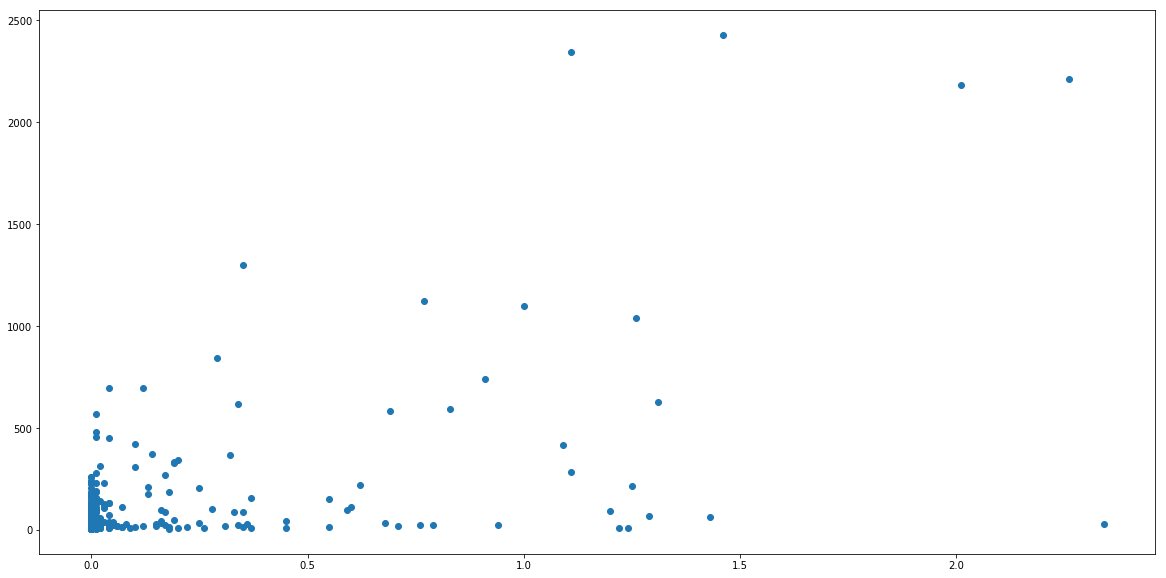

In [9]:
plt.figure(figsize=(20,10))

plt.scatter(precip_list, avg_dC_list)

In [10]:
plt.show()

In [19]:
#gH as function dcG (need to add avg dcG from NOAA1)
# print(gH_cleaned)
# print(NOAA1)

NOAA_gh_Same_date = pd.merge(NOAA, gH_cleaned, on = 'Date')
print(NOAA_gh_Same_date)


       Date  Precip (in)  avg dC(ft/sec)   mgH
0   5/14/18         0.01           15.70  3.44
1   5/15/18         0.00           19.94  3.37
2   5/16/18         0.94           24.89  3.40
3   5/17/18         0.06           18.34  3.30
4   5/18/18         0.01           15.16  3.25
5   5/19/18         0.10           16.57  3.26
6   5/20/18         0.03           39.58  3.52
7   5/21/18         0.01           17.26  3.28
8   5/22/18         1.31          629.30  6.40
9   5/23/18         0.01          189.25  4.55
10  5/24/18         0.00           70.46  3.78
11  5/25/18         0.00           44.40  3.59
12  5/26/18         0.00           37.67  3.52
13  5/27/18         1.20           92.85  3.93
14  5/28/18         0.00           42.82  3.57
15  5/29/18         0.00           32.16  3.47
16  5/30/18         0.00           27.04  3.42
17  5/31/18         0.36           29.22  3.44
18   6/1/18         0.15           28.41  3.44
19   6/2/18         0.00           25.42  3.40
20   6/3/18  

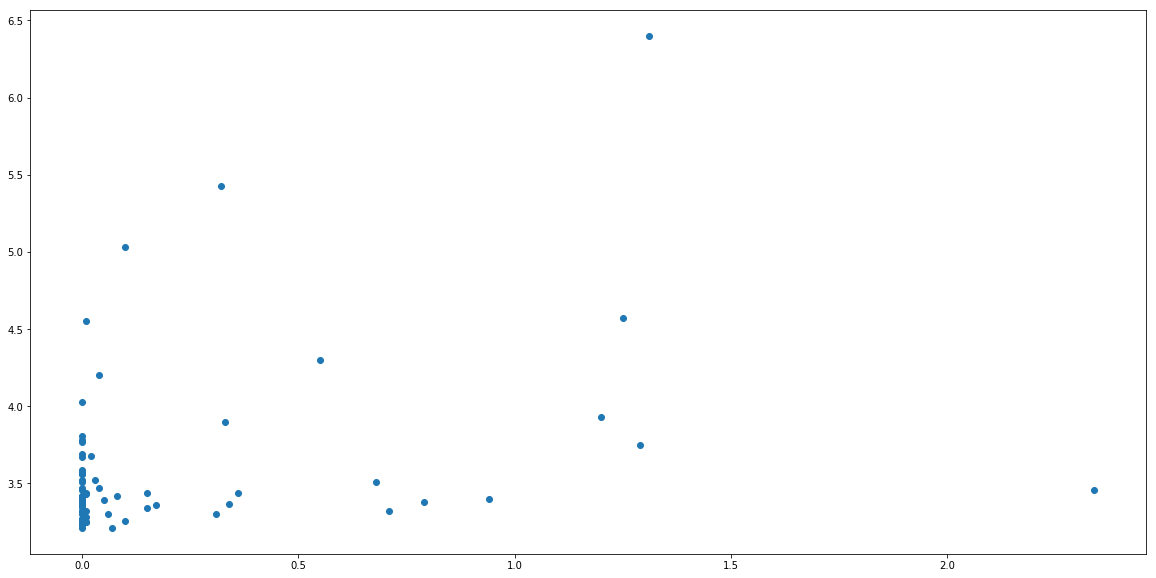

In [21]:
plt.figure(figsize = (20, 10))
plt.scatter(NOAA_gh_Same_date['Precip (in)'], NOAA_gh_Same_date['mgH'])
plt.show()

# Requirements:

### 1) - Appropriate reading of data files

### 2) - Appropriate use of data structures to store info

### 3) - Appropriate operations to manipulate data to uncover data story

### 4) - Using appropriate python procedures to perform data manipulations efficently

### 5) - Attention to missing data values

### 6) - Adhereance to Tidy Data format

### 7) Demonstrating good python programming skills

### 8) - Creation of of quality visual products to illustrate the data 

# Background Research:
### 1) - Where is Raccoon Creek? 

### 2) - What is Raccoon Creek watershed?

### 3) - What is the nature of the creek (size, length, depth, etc.)

### 4) - Where are the sensors that record the data 

### 5) - Who own and maintains these sensors 

### 6) - Where is the data publicly available?

### 7) - What are the measurements that are being provided in the data story? 

### 8) - How can you explain or relate these measurements to non-technical (non geoscience) people?

### 9) - How will you set the background in your notebook story? 

### 10) - What grpahics might  you include in your story?

# Writing Quality:
### 1) - What is your thesis? (won't know until complete investigation)

### 2) - What single compelling discovery drives the data story?

### 3) - How will you communicate your thesis in the notebook format?

### 4) - Who is your audience?

### 5) - Who will read this?

### 6) - What diversity can you expect in their backgrounds and levels of expertise? (These ppl will not know anything about the assignment)

### 7) - What structure will you use to tell your data story using the notebook format to present this story?

### 8) - Style - transition smoothly

### 9) - Writing center 